In [ ]:
#Kalli 

#research questions:

#Is biodiversity higher amongsst all types of animals in Indienous managed lands than other types of land management?

#Where are the protected areas and Indigenous managed lands? how do their areas compare

#What is the average biodiversity richness amongst the different taxa by land type

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame as gdf

In [11]:
cabl = pd.read_csv(r"C:\Users\inca\DATA301\group-project\project-group33\data\ca_bl_csv.csv")
print(cabl)
#indigenous land coordinates and area

      Bl Id       Area ha      Geometry             X             Y
0         1   1097.780956  MultiPolygon -1.706988e+06  1.433390e+06
1         2  42425.385773  MultiPolygon -1.262735e+06  1.216804e+06
2         3   3546.714044  MultiPolygon -7.676702e+05  1.576802e+06
3         4   6689.313692  MultiPolygon  1.901223e+05  9.536057e+05
4         5   4219.063603  MultiPolygon  1.202830e+06  4.350238e+05
...     ...           ...           ...           ...           ...
3119   3120  13812.760288  MultiPolygon -1.279520e+06  1.593219e+06
3120   3121   1197.819988  MultiPolygon  1.700731e+06  8.769669e+05
3121   3122      1.702572       Polygon -1.155076e+05  1.740449e+06
3122   3123    594.515208       Polygon -3.218225e+05  1.748492e+06
3123   3124      3.673194       Polygon -3.649301e+05  1.167788e+06

[3124 rows x 5 columns]


In [18]:
dfpa = pd.DataFrame(
    {'PA Id': capa['Pa Id'],
     'Area': capa['Area ha'],
     'Latitude': capa['X'],
     'Longitude': capa['Y']
    })

#dataframe of indigenous land coordinates 

In [17]:
dfil = pd.DataFrame(
    {'Bl Id': cabl['Bl Id'],
     'Area': cabl['Area ha'],
     'Latitude': cabl['X'],
     'Longitude': cabl['Y']
    })

#dataframe of protected areas coordinates 

In [19]:
points2= gdf(dfpa, geometry=gpd.points_from_xy(dfpa.Longitude, dfpa.Latitude))
#coordinates as points/geometry

<AxesSubplot:>

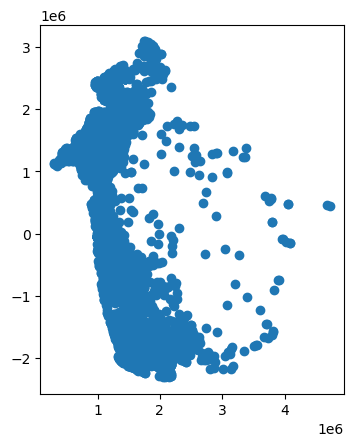

In [20]:
points2.plot()
#test plot points pa to use in tableau

In [21]:

points= gdf(dfil, geometry=gpd.points_from_xy(dfil.Longitude, dfil.Latitude))
#coordinates as points/geometry

<AxesSubplot:>

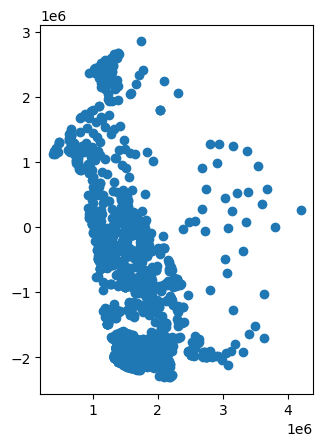

In [22]:
points.plot()
#test plot points il to use in tableau

In [23]:
capa = pd.read_csv(r"C:\Users\inca\DATA301\group-project\project-group33\data\ca_pa_csv.csv")
print(capa)
#protected area coordinates and area

      Pa Id        Area ha      Geometry             X             Y
0         1   57236.290806  MultiPolygon  2.311578e+06  1.619671e+06
1         2  460728.521456  MultiPolygon  1.197736e+06  1.575025e+06
2         3  887829.688565       Polygon  1.112296e+06  1.746088e+06
3         4     180.967188  MultiPolygon  2.209509e+06  1.389117e+06
4         5  132310.828176       Polygon  1.001032e+06  2.226969e+06
...     ...            ...           ...           ...           ...
6759   6760     242.612449       Polygon  1.136964e+06  3.718787e+05
6760   6761   19129.447701       Polygon  1.127249e+06  1.382726e+06
6761   6762    6099.001906       Polygon  1.118564e+06  1.381635e+06
6762   6763     116.884868       Polygon  4.789753e+05  8.974837e+05
6763   6764    3047.826560       Polygon  2.608420e+06  1.356572e+06

[6764 rows x 5 columns]


In [24]:
casts = pd.read_csv(r"C:\Users\inca\DATA301\group-project\project-group33\data\Supp_mat_Table_CA.csv")
print(casts)
#area of each animals habitat by taxa and IUCN status (how severely endangered)


                        Name        Taxa IUCN Status    Total area  \
0         Accipiter cooperii       Birds          LC  8.209158e+11   
1         Accipiter gentilis       Birds          LC  6.745660e+12   
2         Accipiter striatus       Birds          LC  5.218404e+12   
3            Acris crepitans  Amphibians          LC  3.660903e+07   
4        Actinemys marmorata    Reptiles          VU  6.058121e+09   
..                       ...         ...         ...           ...   
686   Zonotrichia albicollis       Birds          LC  5.050491e+12   
687  Zonotrichia atricapilla       Birds          LC  9.085678e+11   
688   Zonotrichia leucophrys       Birds          LC  4.923392e+12   
689      Zonotrichia querula       Birds          LC  1.691911e+12   
690          Zoothera naevia       Birds          LC  1.774131e+12   

     Indigenous lands area  Protected area  Percent on IL  Percent on PA  
0             1.344253e+10    9.191106e+10       1.637504      11.196162  
1        

In [25]:
biorich = pd.read_csv(r"C:\Users\inca\DATA301\group-project\project-group33\data\Spp_group_detail_update.csv")
#canada,brazil,australia biodiversity richness by IUCN most at risk and taxa


In [26]:
biorich.sort_values('name')
#sorting by name

,name,ClassBL_ID,2.5 %,97.5 %,ClassPA_ID,2.5 %.1,97.5 %.1,ClassRP_ID,2.5 %.2,97.5 %.2
0,AU.AM,2.730530,2.709061,2.752112,2.513366,2.499115,2.527662,2.340550,2.326306,2.354835
4,AU.AM.IUCN,1.138098,1.102814,1.173248,0.569955,0.548520,0.591305,0.895765,0.850384,0.940853
1,AU.BR,5.277432,5.267733,5.287160,5.302828,5.295818,5.309854,5.130212,5.123372,5.137067
5,AU.BR.IUCN,1.218775,1.200542,1.236945,1.509343,1.498263,1.520404,0.963789,0.949904,0.977631
2,AU.MA,3.530891,3.518804,3.543008,3.358568,3.350472,3.366676,3.321877,3.313983,3.329782
6,AU.MA.IUCN,0.966827,0.942851,0.990612,0.840870,0.823981,0.857665,0.669701,0.649985,0.689288
3,AU.RE,2.691339,2.677722,2.704983,2.161355,2.150573,2.172144,2.419799,2.409813,2.429796
7,AU.RE.IUCN,1.281359,1.257098,1.305426,0.603727,0.558836,0.647956,0.768713,0.734808,0.802238
8,BR.AM,4.227088,4.199341,4.255043,4.162213,4.139870,4.184688,4.118492,4.110992,4.126007
12,BR.AM.IUCN,0.201740,0.003185,0.387960,0.297252,0.207381,0.384504,0.156698,0.091268,0.220731


In [27]:
biorich.loc[0:19,'Taxa'] = ['Amphibians','Birds','Mammals','Reptiles','Amphibians','Birds','Mammals','Reptiles','Amphibians','Birds','Mammals','Reptiles','Amphibians','Birds','Mammals','Reptiles','Amphibians','Birds','Mammals','Reptiles']

#adding taxa column so taxa field matches on both biorich and casts table

In [28]:
biorich.rename(columns = {'ClassBL_ID':'bio-rich IL','ClassPA_ID':'bio-rich PA', 'ClassRP_ID':'bio-rich RP'}, inplace = True)
#rename to refer to bio diversity richness

In [29]:
biorich = biorich[0:22]
#getting rid of bottom row with no values

In [30]:
biorich

,name,bio-rich IL,2.5 %,97.5 %,bio-rich PA,2.5 %.1,97.5 %.1,bio-rich RP,2.5 %.2,97.5 %.2,Taxa
0,AU.AM,2.730530,2.709061,2.752112,2.513366,2.499115,2.527662,2.340550,2.326306,2.354835,Amphibians
1,AU.BR,5.277432,5.267733,5.287160,5.302828,5.295818,5.309854,5.130212,5.123372,5.137067,Birds
2,AU.MA,3.530891,3.518804,3.543008,3.358568,3.350472,3.366676,3.321877,3.313983,3.329782,Mammals
3,AU.RE,2.691339,2.677722,2.704983,2.161355,2.150573,2.172144,2.419799,2.409813,2.429796,Reptiles
4,AU.AM.IUCN,1.138098,1.102814,1.173248,0.569955,0.548520,0.591305,0.895765,0.850384,0.940853,Amphibians
5,AU.BR.IUCN,1.218775,1.200542,1.236945,1.509343,1.498263,1.520404,0.963789,0.949904,0.977631,Birds
6,AU.MA.IUCN,0.966827,0.942851,0.990612,0.840870,0.823981,0.857665,0.669701,0.649985,0.689288,Mammals
7,AU.RE.IUCN,1.281359,1.257098,1.305426,0.603727,0.558836,0.647956,0.768713,0.734808,0.802238,Reptiles
8,BR.AM,4.227088,4.199341,4.255043,4.162213,4.139870,4.184688,4.118492,4.110992,4.126007,Amphibians
9,BR.BR,6.131266,6.117146,6.145445,6.052237,6.040884,6.063627,6.020114,6.016312,6.023920,Birds


In [256]:
d = {
    'kind':['Birds','Amphibians','Reptiles','Mammals'],
   'Score1':[4.980055,1.648132,1.194125,3.699903],
   'Score2':[4.932325,2.197534,1.317958,3.674117]}

df = pd.DataFrame(d)
print (df)

         kind    Score1    Score2
0       Birds  4.980055  4.932325
1  Amphibians  1.648132  2.197534
2    Reptiles  1.194125  1.317958
3     Mammals  3.699903  3.674117


In [31]:
conditions = [
    casts['Taxa'].eq('Birds') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Amphibians') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Reptiles') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Mammals') & biorich['Taxa'].eq(casts['Taxa'])
]

choices = [4.980055, 1.648132,1.194125, 3.699903]

casts['il bio'] = np.select(conditions, choices, default=0)

#adding il biorichness column where taxa matches up

In [32]:
conditions = [
    casts['Taxa'].eq('Birds') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Amphibians') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Reptiles') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Mammals') & biorich['Taxa'].eq(casts['Taxa'])
]

choices = [4.932325, 1.466758,1.317958, 3.674117]

casts['pa bio'] = np.select(conditions, choices, default=0)

#adding pa biorichness column where taxa matches up

In [33]:
conditions = [
    casts['Taxa'].eq('Birds') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Amphibians') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Reptiles') & biorich['Taxa'].eq(casts['Taxa']),
    casts['Taxa'].eq('Mammals') & biorich['Taxa'].eq(casts['Taxa'])
]

choices = [4.525592, 2.197534, 0.973874, 3.382670]

casts['rp bio'] = np.select(conditions, choices, default=0)

#adding rp biorichness where taxa matches up

In [34]:
casts

,Name,Taxa,IUCN Status,Total area,Indigenous lands area,Protected area,Percent on IL,Percent on PA,il bio,pa bio,rp bio
0,Accipiter cooperii,Birds,LC,8.209158e+11,1.344253e+10,9.191106e+10,1.637504,11.196162,0.000000,0.000000,0.000000
1,Accipiter gentilis,Birds,LC,6.745660e+12,1.462687e+11,6.723923e+11,2.168338,9.967775,4.980055,4.932325,4.525592
2,Accipiter striatus,Birds,LC,5.218404e+12,1.436711e+11,5.284571e+11,2.753161,10.126797,0.000000,0.000000,0.000000
3,Acris crepitans,Amphibians,LC,3.660903e+07,0.000000e+00,9.291127e+05,0.000000,2.537933,0.000000,0.000000,0.000000
4,Actinemys marmorata,Reptiles,VU,6.058121e+09,2.600110e+07,1.684018e+09,0.429194,27.797697,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
686,Zonotrichia albicollis,Birds,LC,5.050491e+12,7.269958e+10,4.722722e+11,1.439456,9.351016,0.000000,0.000000,0.000000
687,Zonotrichia atricapilla,Birds,LC,9.085678e+11,2.446415e+10,1.597776e+11,2.692606,17.585656,0.000000,0.000000,0.000000
688,Zonotrichia leucophrys,Birds,LC,4.923392e+12,3.079566e+11,5.841495e+11,6.254969,11.864777,0.000000,0.000000,0.000000
689,Zonotrichia querula,Birds,LC,1.691911e+12,2.761746e+11,1.981963e+11,16.323239,11.714345,0.000000,0.000000,0.000000


In [35]:
casts.keys()

Index(['Name', 'Taxa', 'IUCN Status', 'Total area', 'Indigenous lands area',
       'Protected area', 'Percent on IL', 'Percent on PA', 'il bio', 'pa bio',
       'rp bio'],
      dtype='object')

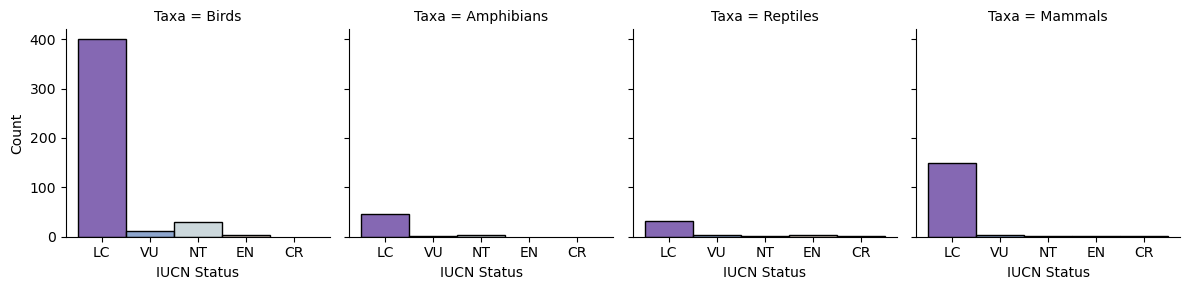

In [36]:
sns.set_palette('twilight_shifted')

g = sns.FacetGrid(casts, col='Taxa', hue = 'IUCN Status')
g.map(sns.histplot, 'IUCN Status')

#bird taxa has the most animals with endangered listing, but they are predominantly 'of least concern' category
#next highest count was mammals, most being lC and a few NT
#amphibians have animals in three list categories, lC. EN and CR
#reptiles have the highest counts of NT and VU, and no LC

#NT = Near Threatened, LC = Least Concern, VU = Vulnerable, EN  = endangered, CR = Critically Endangered

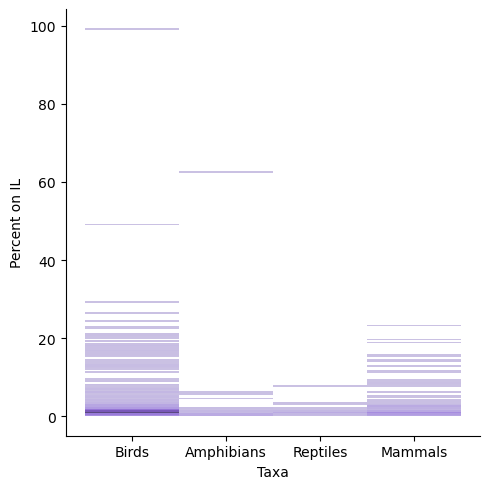

In [377]:
sns.displot(data=casts, x='Taxa', y='Percent on IL')
#shows the percent of habitat on IL by taxa
#there is some birds with near 100% of their habitat on il
#over 60% habitat of some amphbians on il
# habitat ranging from around 20-100% on il

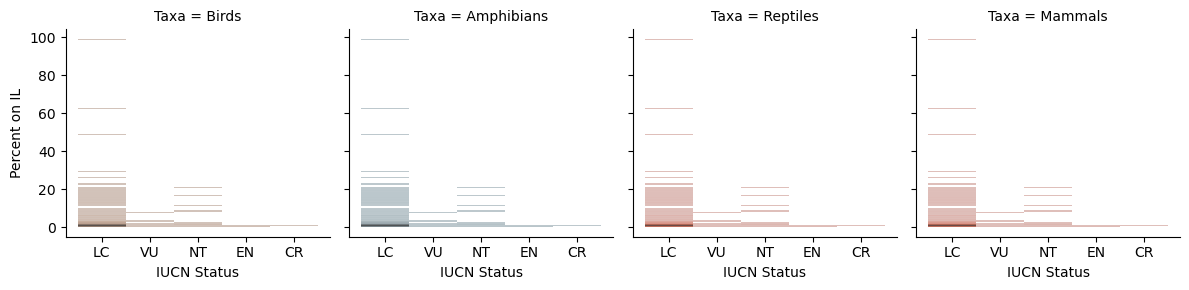

In [378]:
h = sns.FacetGrid(casts, col='Taxa', hue = 'IUCN Status')
h.map(sns.histplot,data = casts, x = 'IUCN Status', y = 'Percent on IL')

#looking at % on il of habitat by taxa and by IUCN status
#many of the animals are of 'LC' category, and many of them have a signifigant proportion of the habitat on IL
# exluding LC, there is noticable amount of near threatened species on IL across all taxa

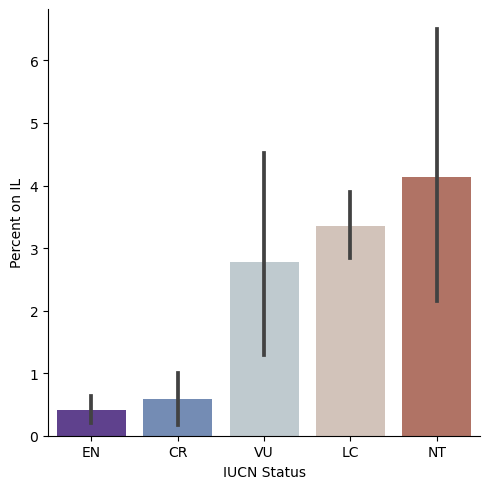

In [384]:
sns.catplot(data=casts, x="IUCN Status", y="Percent on IL", order = ["EN","CR","VU","LC","NT"], kind="bar")
# this represents the percentage of inigenous managed lands within the range of where these categories of IUCN listed animals can be found 
#lower % of critical than PA, at almost 12.5%



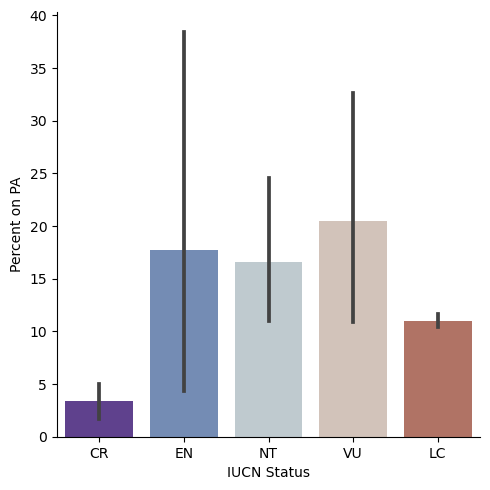

In [385]:
sns.catplot(data=casts, x="IUCN Status", y="Percent on PA", order = ["CR","EN","NT","VU","LC"],  kind="bar")
#this represents the percentage of protected areas within the range of where these IUCN listed animals can be found

In [461]:
temp = pd.DataFrame({
    "name": casts['Name'],
    "iucn": casts['IUCN Status'],
    "group": casts['Taxa'],
    "bio il" : casts['il bio'],
    "bio pa" : casts['pa bio'],
    "bio rp" : casts['rp bio']
})

# Show 3 first rows
temp.head(3)

,name,iucn,group,bio il,bio pa,bio rp
0,Accipiter cooperii,LC,Birds,4.980055,4.932325,0.000000
1,Accipiter gentilis,LC,Birds,4.980055,4.932325,4.525592
2,Accipiter striatus,LC,Birds,4.980055,4.932325,0.000000


<AxesSubplot:xlabel='Percent on IL', ylabel='il bio'>

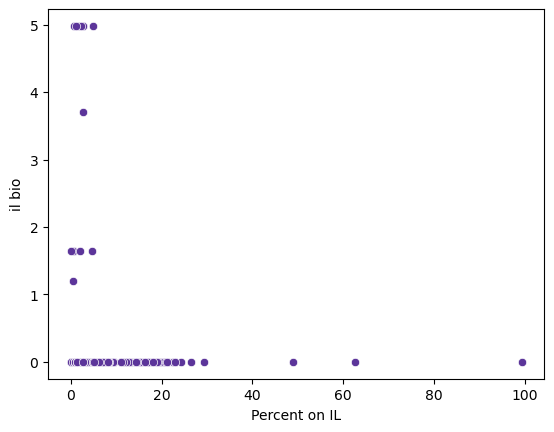

In [464]:
sns.scatterplot(casts,x = 'Percent on IL', y = 'il bio')

<AxesSubplot:xlabel='Percent on PA', ylabel='pa bio'>

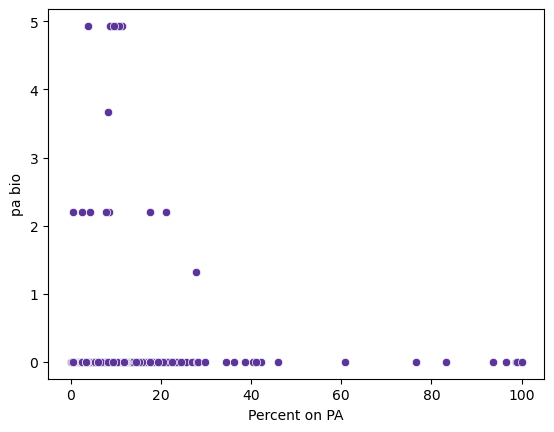

In [465]:
sns.scatterplot(casts,x = 'Percent on PA', y = 'pa bio')

In [37]:
casts.to_csv('ca.sts.csv')

In [38]:
biorich.to_csv('bio.rich.csv')